In [4]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import zipfile
import cv2
import numpy as np
import pandas as pd
from scipy.ndimage import median_filter
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder ,LabelEncoder

# import Deep learning Libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,InputLayer, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils import to_categorical
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
# Print statement confirming successful loading of modules
print ('modules loaded')

modules loaded


In [3]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 38.6/38.6 MB 261.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
# Define dataset paths
dataset_path_train = 'C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset-FER/train'

# Initialize lists to store data, labels, and paths
data = []
labels = []
paths = []
# Iterate through the dataset directory
for class_name in os.listdir(dataset_path_train):
    class_dir = os.path.join(dataset_path_train, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)
        
df_train = pd.DataFrame({'data': paths, 'label': labels})
data = np.array(data)
labels = np.array(labels)

In [48]:
df_train

,data,label
0,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
1,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
2,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
3,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
4,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
...,...,...
28704,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
28705,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
28706,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
28707,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise


In [51]:
dataset_path_test = 'C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset-FER/test'

# Initialize lists to store data, labels, and paths
data = []
labels = []
paths = []
for class_name in os.listdir(dataset_path_test):
    class_dir = os.path.join(dataset_path_test, class_name)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        paths.append(img_path)
        img = cv2.imread(img_path) 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        data.append(img)
        labels.append(class_name)
        
        
df_test = pd.DataFrame({'data': paths, 'label': labels})
data = np.array(data)
labels = np.array(labels)

In [52]:
df_test

,data,label
0,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
1,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
2,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
3,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
4,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,angry
...,...,...
7173,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
7174,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
7175,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise
7176,C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset...,surprise


In [28]:
import os
import pandas as pd

# Path to the directory containing the dataset
dataset_path = 'C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset-FER/train'

# Dictionary to store the counts for each label
label_counts = {}

# Iterate through the subdirectories
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    # Count the number of files (images) in each subdirectory
    num_images = len(os.listdir(label_dir))
    # Store the count for the label
    label_counts[label] = num_images

# Convert the dictionary to a DataFrame
df_label_counts = pd.DataFrame.from_dict(label_counts, orient='index', columns=['     Number of Images'])

# Display the DataFrame
print("Label Counts:")
print(df_label_counts)


Label Counts:
               Number of Images
angry                      3995
disgust                     436
fear                       4097
happy                      7215
neutral                    4965
sad                        4830
surprise                   3171


In [29]:
import os
import pandas as pd

# Path to the directory containing the dataset
dataset_path = 'C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset-FER/test'

# Dictionary to store the counts for each label
label_counts = {}

# Iterate through the subdirectories
for label in os.listdir(dataset_path):
    label_dir = os.path.join(dataset_path, label)
    # Count the number of files (images) in each subdirectory
    num_images = len(os.listdir(label_dir))
    # Store the count for the label
    label_counts[label] = num_images

# Convert the dictionary to a DataFrame
df_label_counts = pd.DataFrame.from_dict(label_counts, orient='index', columns=['     Number of Images'])

# Display the DataFrame
print("Label Counts:")
print(df_label_counts)


Label Counts:
               Number of Images
angry                       958
disgust                     111
fear                       1024
happy                      1774
neutral                    1233
sad                        1247
surprise                    831


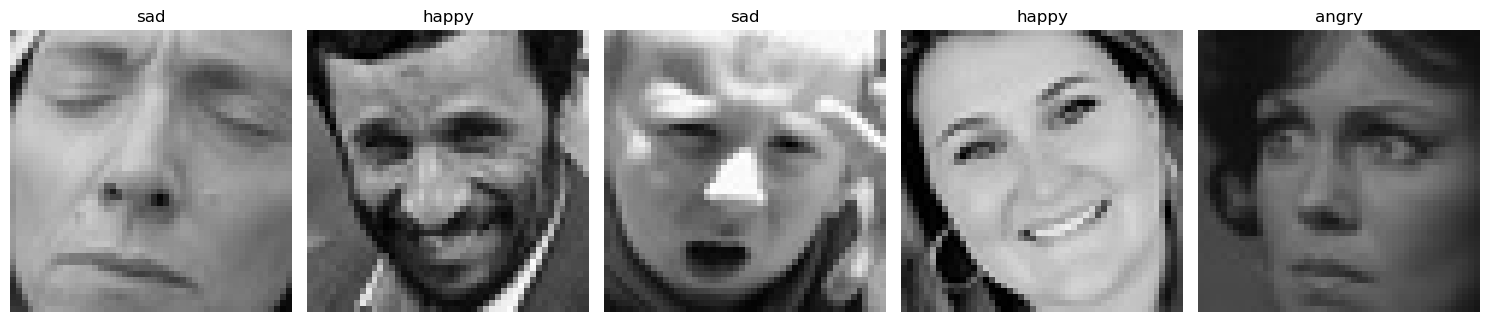

In [38]:
def display_random_images(images, labels, num_images=5):
    num_total_images = len(images)
    random_indices = np.random.choice(num_total_images, size=num_images, replace=False)

    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(labels[idx])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

display_random_images(data, labels)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42 , stratify = labels)

In [11]:
y_train = to_categorical(y_train, num_classes=7)  # Convert training labels to one-hot encoded format
y_test = to_categorical(y_test, num_classes=7) 

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

print("x_train data type:", x_train.dtype)
print("y_train data type:", y_train.dtype)
print("x_test data type:", x_test.dtype)
print("y_test data type:", y_test.dtype)

<class 'numpy.ndarray'> (28709, 48, 48, 3)
<class 'numpy.ndarray'> (28709, 7)
<class 'numpy.ndarray'> (7178, 48, 48, 3)
<class 'numpy.ndarray'> (7178, 7)
x_train data type: float64
y_train data type: float32
x_test data type: float64
y_test data type: float32


In [14]:
ann_model = Sequential()

ann_model.add(InputLayer(input_shape=(48, 48, 3)))
ann_model.add(Flatten())

ann_model.add(Dense(64, activation='leaky_relu'))
ann_model.add(BatchNormalization())
ann_model.add(Dropout(0.2))

ann_model.add(Dense(7, activation='softmax'))

ann_model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 6912)              0         
                                                                 
 dense (Dense)               (None, 64)                442432    
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 455       
                                                                 
Total params: 443143 (1.69 MB)
Trainable params: 443015 (1.69 MB)
Non-trainable params: 128 (512.00 Byte)
________________

In [15]:
history_ann = ann_model.fit(x_train,y_train,validation_data = (x_test, y_test),epochs = 40 )

Epoch 1/40
898/898 [==============================] - 11s 10ms/step - loss: 1.8014 - accuracy: 0.3038 - val_loss: 1.6547 - val_accuracy: 0.3526
Epoch 2/40
898/898 [==============================] - 10s 11ms/step - loss: 1.6792 - accuracy: 0.3455 - val_loss: 1.6867 - val_accuracy: 0.3250
Epoch 3/40
898/898 [==============================] - 9s 10ms/step - loss: 1.6450 - accuracy: 0.3583 - val_loss: 1.7155 - val_accuracy: 0.3327
Epoch 4/40
898/898 [==============================] - 9s 10ms/step - loss: 1.6295 - accuracy: 0.3656 - val_loss: 1.6975 - val_accuracy: 0.3286
Epoch 5/40
898/898 [==============================] - 9s 10ms/step - loss: 1.6187 - accuracy: 0.3722 - val_loss: 1.6552 - val_accuracy: 0.3658
Epoch 6/40
898/898 [==============================] - 9s 10ms/step - loss: 1.6131 - accuracy: 0.3740 - val_loss: 1.6894 - val_accuracy: 0.3502
Epoch 7/40
898/898 [==============================] - 9s 10ms/step - loss: 1.6043 - accuracy: 0.3775 - val_loss: 1.6766 - val_accuracy: 0.35

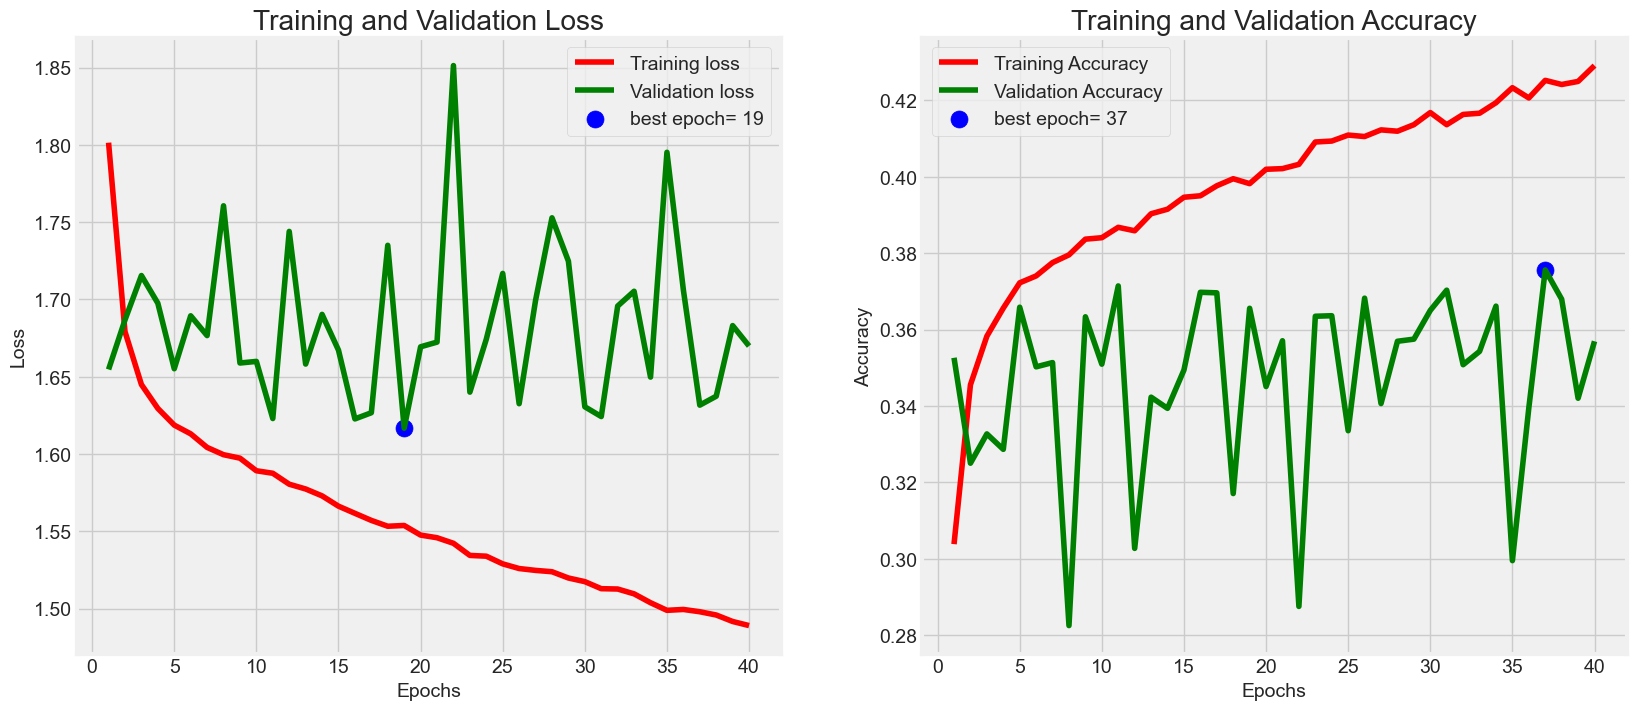

In [16]:
# Define needed variables
tr_acc = history_ann.history['accuracy']
tr_loss = history_ann.history['loss']
val_acc = history_ann.history['val_accuracy']
val_loss = history_ann.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [17]:
ann_model.save('ann_model_optimal.h5')

# Data Augmantation

In [18]:
strat = df['label']
train_df,validate_df = train_test_split(df,train_size = 0.80,shuffle = True, random_state = 42, stratify = strat)

In [19]:
batch_size = 64
img_size = (48,48)
channels = 3
img_shape = (img_size[0],img_size[1],channels)

# Create different ImageDataGenerator objects for training and testing/validation sets
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range = 0.1,   
    height_shift_range = 0.1,
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True)
valid_gen = ImageDataGenerator(rescale=1./255)


# Specify the directory argument for each set
train_gen = train_gen.flow_from_dataframe(dataframe = train_df, x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale'
                                      , shuffle = True, batch_size = batch_size)
validate_gen = valid_gen.flow_from_dataframe(dataframe = validate_df,x_col = 'data' ,y_col = 'label', target_size = img_size, class_mode = 'categorical',color_mode = 'grayscale',
                                          shuffle = True, batch_size = batch_size)

Found 28709 validated image filenames belonging to 7 classes.
Found 7178 validated image filenames belonging to 7 classes.


# CNN

In [20]:
model = Sequential([
    Conv2D(64,(3,3),activation = 'relu', input_shape = (48,48,1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Conv2D(128,(3,3),activation = 'relu'),
    Conv2D(128,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Conv2D(256,(3,3),activation = 'relu'),
    Conv2D(256,(3,3),activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Dropout(0.30,seed = 42),
    
    Dense(64,activation = 'relu'),
    Dropout(rate =0.35,seed = 42),
    Flatten(),
    Dense(7,activation = 'softmax')
])

model.compile(optimizer = "adam" , loss = "categorical_crossentropy" , metrics = ["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 64)        640       
                                                                 
 batch_normalization_1 (Bat  (None, 46, 46, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 64)        0         
 D)                                                              
                                                                 
 dropout_1 (Dropout)         (None, 23, 23, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 128)      

In [22]:
history = model.fit(x= train_gen, epochs = 80 , verbose = 1,validation_data = validate_gen,shuffle = True) #80

Epoch 1/80
449/449 [==============================] - 391s 872ms/step - loss: 1.7408 - accuracy: 0.2882 - val_loss: 1.6961 - val_accuracy: 0.3101
Epoch 2/80
449/449 [==============================] - 387s 862ms/step - loss: 1.6667 - accuracy: 0.3359 - val_loss: 1.6931 - val_accuracy: 0.2942
Epoch 3/80
449/449 [==============================] - 381s 848ms/step - loss: 1.6033 - accuracy: 0.3708 - val_loss: 1.5676 - val_accuracy: 0.3929
Epoch 4/80
449/449 [==============================] - 421s 938ms/step - loss: 1.5564 - accuracy: 0.3923 - val_loss: 1.5597 - val_accuracy: 0.3957
Epoch 5/80
449/449 [==============================] - 490s 1s/step - loss: 1.5213 - accuracy: 0.4131 - val_loss: 1.5634 - val_accuracy: 0.3761
Epoch 6/80
449/449 [==============================] - 427s 952ms/step - loss: 1.4873 - accuracy: 0.4236 - val_loss: 1.4048 - val_accuracy: 0.4595
Epoch 7/80
449/449 [==============================] - 447s 995ms/step - loss: 1.4558 - accuracy: 0.4398 - val_loss: 1.5280 - va

Epoch 57/80
449/449 [==============================] - 411s 914ms/step - loss: 1.1052 - accuracy: 0.5836 - val_loss: 1.2396 - val_accuracy: 0.5305
Epoch 58/80
449/449 [==============================] - 392s 873ms/step - loss: 1.1025 - accuracy: 0.5828 - val_loss: 1.1518 - val_accuracy: 0.5600
Epoch 59/80
449/449 [==============================] - 413s 920ms/step - loss: 1.1007 - accuracy: 0.5863 - val_loss: 1.2446 - val_accuracy: 0.5224
Epoch 60/80
449/449 [==============================] - 398s 887ms/step - loss: 1.0904 - accuracy: 0.5913 - val_loss: 1.0637 - val_accuracy: 0.5982
Epoch 61/80
449/449 [==============================] - 421s 938ms/step - loss: 1.0915 - accuracy: 0.5884 - val_loss: 1.1611 - val_accuracy: 0.5478
Epoch 62/80
449/449 [==============================] - 385s 857ms/step - loss: 1.0926 - accuracy: 0.5886 - val_loss: 1.0955 - val_accuracy: 0.5837
Epoch 63/80
449/449 [==============================] - 400s 891ms/step - loss: 1.0856 - accuracy: 0.5913 - val_loss: 1

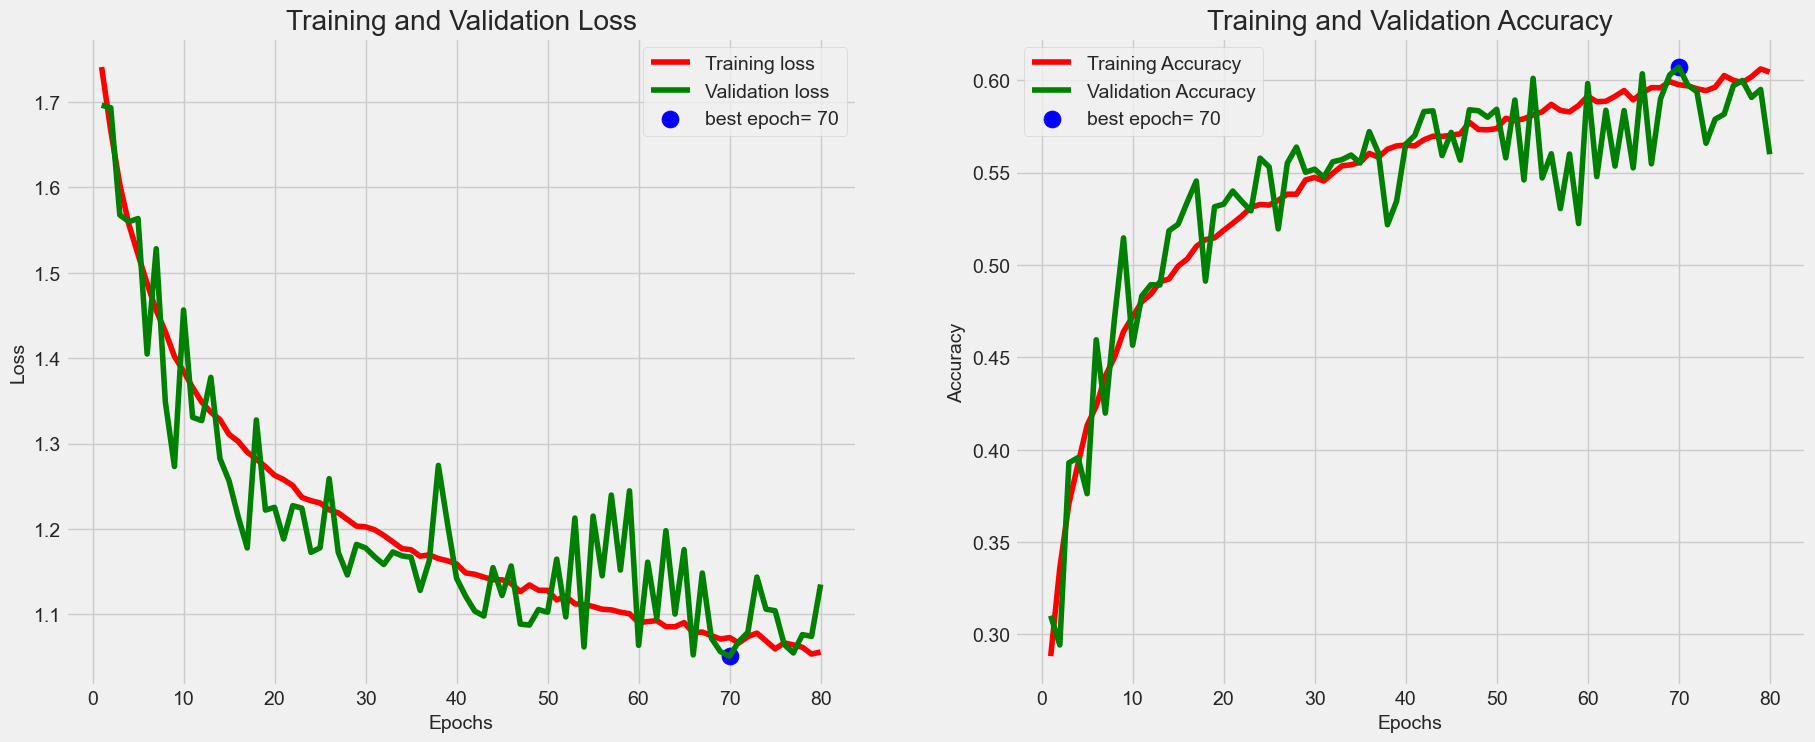

In [23]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [24]:
list(train_gen.class_indices.keys())

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

113/113 [==============================] - 20s 169ms/step


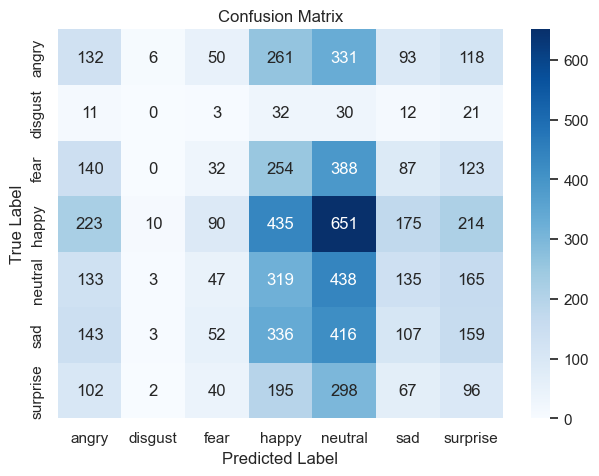

In [25]:

# Get the true labels and predicted labels for the validation set
validation_labels = validate_gen.classes
validation_pred_probs = model.predict(validate_gen)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_gen.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [26]:
def plot_image(i,pred_array,true_label,img):
  pred_array , true_label , img= pred_array[i] , true_label[i] , img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img,cmap=plt.cm.binary)
  predicted_label = np.argmax(pred_array)

  if(predicted_label == true_label):
      color='blue'
  else:
     color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                        100*np.max(pred_array),
                                        Categories[true_label])).set_color(color)
  plt.title("Image {}".format(i + 1))
    
    

In [27]:
def plot_activation_value(i,pred_array,true_label):
  pred_array , true_label = pred_array[i] , true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(len(pred_array)),pred_array,color="#777777")
  plt.ylim([0,1])
  predicted_label = np.argmax(pred_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
  top_classes = np.argsort(pred_array)[-3:][::-1]
    
    

In [33]:
# Convert RGB images to grayscale
x_test_gray = np.dot(x_test[..., :3], [0.2989, 0.5870, 0.1140])

# Reshape the grayscale images to add a channel dimension
x_test_gray = x_test_gray.reshape(-1, 48, 48, 1)

# Make predictions on the grayscale test data
predictions = model.predict(x_test_gray)

# Plot images with predicted and true labels
def plot_image(i, pred_array, true_label, img):
    pred_array, true_label, img = pred_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(pred_array)

    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(pred_array), class_names[np.argmax(true_label)])).set_color(color)
    plt.title("Image {}".format(i + 1))



225/225 [==============================] - 18s 79ms/step


In [42]:
model.save('model_optimal.h5')

1/1 [==============================] - 0s 25ms/step
Predicted Emotion: angry
Probabilities: [0.6240646  0.01388008 0.08028686 0.11159573 0.05280179 0.10533407
 0.01203689]


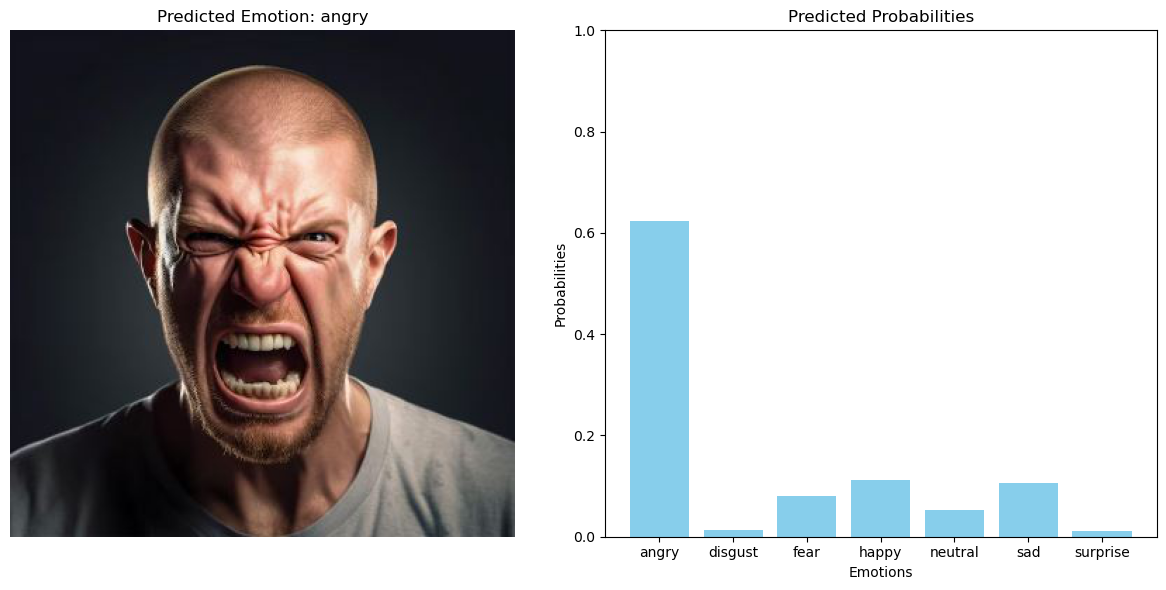

In [64]:
import matplotlib.pyplot as plt

# Define a function to predict emotion from the image
def predict_emotion(image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make predictions
    predictions = model.predict(img)
    # Get the predicted emotion label
    predicted_label = np.argmax(predictions)
    # Map the label to the corresponding emotion
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    predicted_emotion = emotions[predicted_label]
    return predicted_emotion, predictions[0]

# Function to plot predicted probabilities
def plot_probabilities(probabilities):
    emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
    plt.figure(figsize=(12, 6))
    
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(f'Predicted Emotion: {predicted_emotion}')
    plt.axis('off')
    
    # Plot the probabilities
    plt.subplot(1, 2, 2)
    plt.bar(emotions, probabilities, color='skyblue')
    plt.xlabel('Emotions')
    plt.ylabel('Probabilities')
    plt.title('Predicted Probabilities')
    plt.ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

# Path to the image
image_path = 'C:/Users/mohit/Desktop/M.tech/SEM2/SET/Dataset-FER/Capture3.jpg'

# Predict emotion
predicted_emotion, probabilities = predict_emotion(image_path)
print('Predicted Emotion:', predicted_emotion)
print('Probabilities:', probabilities)

# Load the image
img = Image.open(image_path)

# Plot image and probability graph side by side
plot_probabilities(probabilities)
